In [1]:
import numpy as np
import matplotlib.pyplot as plt

def minkowski_distance(p1, p2, p_value):
    """Calculate Minkowski distance between two 2D points."""
    return np.sum(np.abs(p1 - p2) ** p_value, axis=-1) ** (1 / p_value)

def voronoi_minkowski(points, parameter_p, resolution=300, x_range=(0, 10), y_range=(0, 10)):
    """
    Create a Voronoi-like diagram based on Minkowski distance.
    
    Args:
        points (np.ndarray): Array of shape (n_points, 2) with coordinates of generating points.
        parameter_p (float): The Minkowski distance parameter p (p >= 1).
        resolution (int): The resolution of the grid for visualization.
        x_range (tuple): Range of x-coordinates for the grid.
        y_range (tuple): Range of y-coordinates for the grid.
    
    Returns:
        None: Displays a plot of the Minkowski Voronoi diagram.
    """
    # Create a grid of points
    x = np.linspace(x_range[0], x_range[1], resolution)
    y = np.linspace(y_range[0], y_range[1], resolution)
    xv, yv = np.meshgrid(x, y)
    grid_points = np.column_stack([xv.ravel(), yv.ravel()])

    # Determine the closest generator for each grid point based on Minkowski distance
    regions = np.zeros(len(grid_points), dtype=int)
    for i, grid_point in enumerate(grid_points):
        distances = minkowski_distance(points, grid_point, parameter_p)
        regions[i] = np.argmin(distances)

    # Reshape the regions into a 2D array for plotting
    regions_reshaped = regions.reshape(resolution, resolution)
    
    # Plot the Voronoi diagram
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.imshow(regions_reshaped, extent=(x_range[0], x_range[1], y_range[0], y_range[1]), 
              origin='lower', cmap='tab20', alpha=0.5)
    ax.scatter(points[:, 0], points[:, 1], color='red', zorder=5, label='Generating Points')
    ax.set_xlim(x_range)
    ax.set_ylim(y_range)
    ax.set_title(f"Voronoi Diagram with Minkowski Distance (p={parameter_p})")
    ax.legend()
    plt.grid(True)
    plt.show()


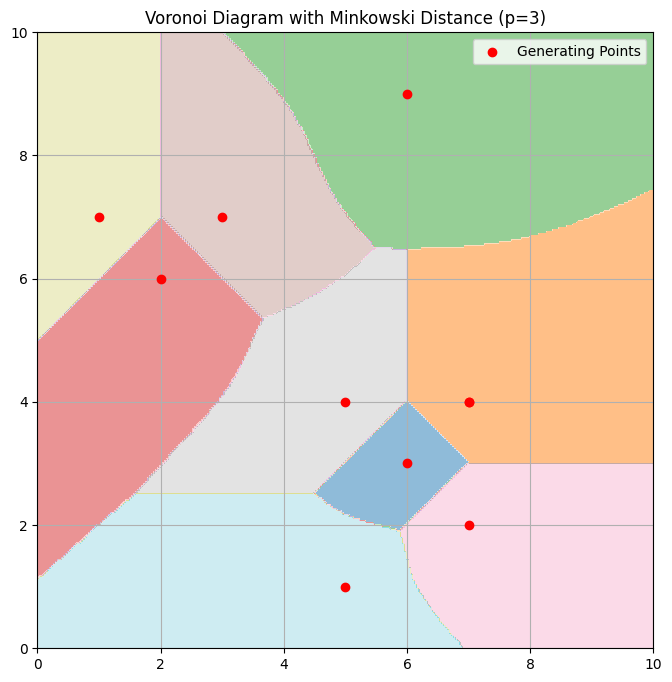

In [2]:
# Example usage with 10 random points and user-specified parameter p
np.random.seed(42)
example_points = np.random.randint(0, 10, (10, 2))
voronoi_minkowski(example_points, parameter_p=3)  # Example with p=3


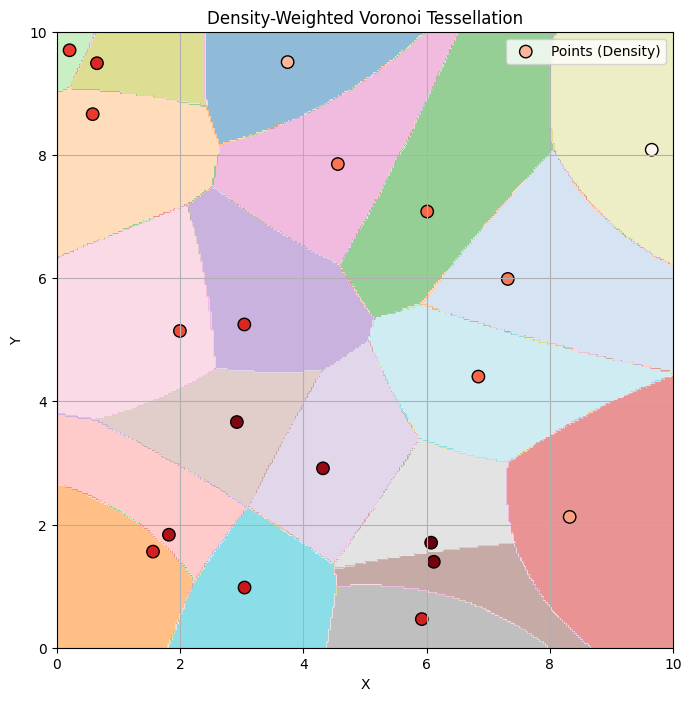

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity

# Function to compute density-weighted distance
def density_weighted_distance(points, densities, p, q):
    d_pq = np.linalg.norm(points[p] - points[q])  # Euclidean distance
    return d_pq / np.sqrt(densities[p] + densities[q])

# Function to estimate densities using KDE
def estimate_density(points, bandwidth=1.0):
    kde = KernelDensity(kernel='gaussian', bandwidth=bandwidth)
    kde.fit(points)
    log_density = kde.score_samples(points)  # Log density for numerical stability
    return np.exp(log_density)  # Convert back to density values

# Function to create a density-weighted Voronoi tessellation
def density_weighted_voronoi(points, densities, resolution=300, x_range=(0, 10), y_range=(0, 10)):
    x = np.linspace(x_range[0], x_range[1], resolution)
    y = np.linspace(y_range[0], y_range[1], resolution)
    xv, yv = np.meshgrid(x, y)
    grid_points = np.column_stack([xv.ravel(), yv.ravel()])

    # Assign each grid point to the nearest point based on density-weighted distance
    regions = np.zeros(len(grid_points), dtype=int)
    for i, grid_point in enumerate(grid_points):
        distances = [
            np.linalg.norm(grid_point - points[j]) / np.sqrt(densities[j])
            for j in range(len(points))
        ]
        regions[i] = np.argmin(distances)

    # Reshape the regions into a 2D array for plotting
    regions_reshaped = regions.reshape(resolution, resolution)
    return xv, yv, regions_reshaped

# Generate random points and compute densities
np.random.seed(42)
points = np.random.uniform(0, 10, (20, 2))  # Random points in a 2D space
densities = estimate_density(points, bandwidth=1.5)  # Estimate densities

# Compute density-weighted Voronoi tessellation
xv, yv, regions = density_weighted_voronoi(points, densities, resolution=300, x_range=(0, 10), y_range=(0, 10))

# Plot the tessellation
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(regions, extent=(0, 10, 0, 10), origin='lower', cmap='tab20', alpha=0.5)
ax.scatter(points[:, 0], points[:, 1], c=densities, cmap='Reds', edgecolor='black', s=80, label='Points (Density)')
ax.set_title("Density-Weighted Voronoi Tessellation")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.legend()
plt.grid(True)
plt.show()
